In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install advertools
!pip install pyvi
!pip install underthesea

In [ ]:
import pandas as pd
import re

from underthesea import word_tokenize
from pyvi import ViTokenizer

# Load data

In [ ]:
data1 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/1_data_music.xlsx")
data2 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/2_Beautify.xlsx")
data3 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/3_ScienceAndTechnology.xlsx")
data4 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/4_Kids.xlsx")
data5 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/5_Food.xlsx")

data9 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/9_fashion.xlsx")
data10 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/10_education.xlsx")
data11 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/11_Gaming.xlsx")
data12 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/12_Medical.xlsx")
data13 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/13 data_film.xlsx")

In [ ]:
data6 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/6_History.xlsx")
data7 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/7_Travel.xlsx")
data8 = pd.read_excel("/content/drive/MyDrive/Do_An Machine Learning 2022/Data/2_Data_Check_Nhan/8_News.xlsx")


In [ ]:
data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13], ignore_index = True)

In [ ]:
data = data[["Title", "Label"]]

In [ ]:
data.head()

,Title,Label
0,Những Ca Khúc Hay Nhất “Âm Nhạc & Đời Sống” Co...,âm nhạc
1,Một Thời Âm Nhạc - Episode 01 | Trúc Hồ Music,âm nhạc
2,NAM EM COVER - HƠI THỞ ÂM NHẠC,âm nhạc
3,Huyền thoại âm nhạc Việt Nam.Phần 2 - Phương T...,âm nhạc
4,Túy Âm - Xesi x Masew x Nhatnguyen,âm nhạc


#Preprocess

Remove numeric values

In [ ]:
data['Title'] = data['Title'].map(lambda x: re.sub(r'\d+', '', x))
data['Title']

0        Những Ca Khúc Hay Nhất “Âm Nhạc & Đời Sống” Co...
1              Một Thời Âm Nhạc - Episode  | Trúc Hồ Music
2                           NAM EM COVER - HƠI THỞ ÂM NHẠC
3        Huyền thoại âm nhạc Việt Nam.Phần  - Phương Thanh
4                       Túy Âm - Xesi x Masew x Nhatnguyen
                               ...                        
26014                 Ngữ văn  : Thuyết minh về cây bút bi
26015    [ Thuyết Minh ] LẤY DANH NGHĨA NGƯỜI NHÀ - Tập...
26016    Phim Xã Hội Đen Thuyết Minh | Hương Cảng Kỳ Bi...
26017    [ Thuyết Minh ] LẤY DANH NGHĨA NGƯỜI NHÀ - Tập...
26018    [THUYẾT MINH] Quân Cửu Linh | Tập  | Phim Cổ T...
Name: Title, Length: 26019, dtype: object

To lowercase

In [ ]:
data['Title'] = data['Title'].map(lambda x: x.lower())
data['Title']

0        những ca khúc hay nhất “âm nhạc & đời sống” co...
1              một thời âm nhạc - episode  | trúc hồ music
2                           nam em cover - hơi thở âm nhạc
3        huyền thoại âm nhạc việt nam.phần  - phương thanh
4                       túy âm - xesi x masew x nhatnguyen
                               ...                        
26014                 ngữ văn  : thuyết minh về cây bút bi
26015    [ thuyết minh ] lấy danh nghĩa người nhà - tập...
26016    phim xã hội đen thuyết minh | hương cảng kỳ bi...
26017    [ thuyết minh ] lấy danh nghĩa người nhà - tập...
26018    [thuyết minh] quân cửu linh | tập  | phim cổ t...
Name: Title, Length: 26019, dtype: object

tokenization using pyvi

In [ ]:
data['Title'] = data['Title'].map(lambda x: ViTokenizer.tokenize(x))
data['Title']

0        những ca_khúc hay nhất “ âm_nhạc & đời_sống ” ...
1               một thời âm_nhạc - episode | trúc hồ music
2                           nam em cover - hơi thở âm_nhạc
3        huyền_thoại âm_nhạc việt_nam . phần - phương t...
4                       túy âm - xesi x masew x nhatnguyen
                               ...                        
26014                  ngữ_văn : thuyết_minh về cây bút_bi
26015    [ thuyết_minh ] lấy danh_nghĩa người_nhà - tập...
26016    phim xã_hội_đen thuyết_minh | hương cảng kỳ bi...
26017    [ thuyết_minh ] lấy danh_nghĩa người_nhà - tập...
26018    [ thuyết_minh ] quân cửu linh | tập | phim cổ ...
Name: Title, Length: 26019, dtype: object

Adjust for some specified case

In [ ]:
data['Title'] = data['Title'].map(lambda x: x.replace("tiếng anh","tiếng_anh"))

Remove puntuations

In [ ]:
data['Title'] = data['Title'].map(lambda x: re.sub(r'[^\w\s]',"",x))
data['Title']

0        những ca_khúc hay nhất  âm_nhạc  đời_sống  col...
1                 một thời âm_nhạc  episode  trúc hồ music
2                            nam em cover  hơi thở âm_nhạc
3         huyền_thoại âm_nhạc việt_nam  phần  phương thanh
4                        túy âm  xesi x masew x nhatnguyen
                               ...                        
26014                   ngữ_văn  thuyết_minh về cây bút_bi
26015     thuyết_minh  lấy danh_nghĩa người_nhà  tập  p...
26016    phim xã_hội_đen thuyết_minh  hương cảng kỳ bin...
26017     thuyết_minh  lấy danh_nghĩa người_nhà  tập  p...
26018     thuyết_minh  quân cửu linh  tập  phim cổ tran...
Name: Title, Length: 26019, dtype: object

tokenize using underthesea

In [ ]:
data['Title'] = data['Title'].map(lambda x: word_tokenize(x))
data['Title']

0        [những, ca_khúc, hay, nhất, âm_nhạc, đời_sống,...
1           [một, thời, âm_nhạc, episode, trúc, hồ, music]
2                      [nam, em, cover, hơi, thở, âm_nhạc]
3        [huyền_thoại, âm_nhạc, việt_nam, phần, phương,...
4                 [túy, âm, xesi, x, masew, x, nhatnguyen]
                               ...                        
26014              [ngữ_văn, thuyết_minh, về, cây, bút_bi]
26015    [thuyết_minh, lấy, danh_nghĩa, người_nhà, tập,...
26016    [phim, xã_hội_đen, thuyết_minh, hương, cảng, k...
26017    [thuyết_minh, lấy, danh_nghĩa, người_nhà, tập,...
26018    [thuyết_minh, quân, cửu, linh, tập, phim, cổ, ...
Name: Title, Length: 26019, dtype: object

In [ ]:
data['Title'] = data['Title'].map(lambda x: [w.replace(" ","_") for w in x])
data['Title']

0        [những, ca_khúc, hay, nhất, âm_nhạc, đời_sống,...
1           [một, thời, âm_nhạc, episode, trúc, hồ, music]
2                      [nam, em, cover, hơi, thở, âm_nhạc]
3        [huyền_thoại, âm_nhạc, việt_nam, phần, phương,...
4                 [túy, âm, xesi, x, masew, x, nhatnguyen]
                               ...                        
26014              [ngữ_văn, thuyết_minh, về, cây, bút_bi]
26015    [thuyết_minh, lấy, danh_nghĩa, người_nhà, tập,...
26016    [phim, xã_hội_đen, thuyết_minh, hương, cảng, k...
26017    [thuyết_minh, lấy, danh_nghĩa, người_nhà, tập,...
26018    [thuyết_minh, quân, cửu, linh, tập, phim, cổ, ...
Name: Title, Length: 26019, dtype: object

Remove stopwords

In [ ]:
import advertools as adv

stop_words = adv.stopwords['vietnamese']
data['Title'] = data['Title'].apply(lambda x: " ".join([w for w in x if w not in stop_words]))

Encode label

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.Label)
data.Label = le.transform(data.Label)
data.tail(5)

,Title,Label
26014,ngữ_văn thuyết_minh bút_bi,5
26015,thuyết_minh danh_nghĩa người_nhà tập phim đàm ...,5
26016,phim xã_hội_đen thuyết_minh hương cảng kỳ binh...,5
26017,thuyết_minh danh_nghĩa người_nhà tập phim đàm ...,5
26018,thuyết_minh quân cửu linh tập phim cổ trang bà...,5


In [ ]:
le.classes_

array(['du lịch', 'giáo dục', 'khoa học và công nghệ', 'làm đẹp',
       'lịch sử', 'phim ảnh', 'thời trang', 'tin tức', 'trò chơi',
       'trẻ em', 'y tế', 'âm nhạc', 'ẩm thực'], dtype=object)

Vectorize feature

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 1))
X = tfidf.fit_transform(data.Title).toarray()

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, data['Label'], random_state = 0, test_size = .33, stratify=data['Label'])

#Train model

Train model using SVM

In [ ]:
svm = linear_model.SGDClassifier(loss='modified_huber',max_iter=1000, tol=1e-3).fit(X_train,y_train)

# Evaluate model

Evaluate

In [ ]:
!pip install scikit-plot

                       precision    recall  f1-score   support

              du lịch       0.93      0.94      0.94       925
             giáo dục       0.95      0.91      0.93       632
khoa học và công nghệ       0.82      0.90      0.86       564
              làm đẹp       0.94      0.96      0.95       561
              lịch sử       0.93      0.92      0.92       937
             phim ảnh       0.91      0.92      0.92       620
           thời trang       0.99      0.98      0.99       607
              tin tức       0.95      0.90      0.92      1070
             trò chơi       0.96      0.93      0.94       680
               trẻ em       0.87      0.92      0.90       459
                 y tế       0.95      0.95      0.95       482
              âm nhạc       0.95      0.96      0.96       511
              ẩm thực       0.93      0.94      0.94       539

             accuracy                           0.93      8587
            macro avg       0.93      0.93      0.93 

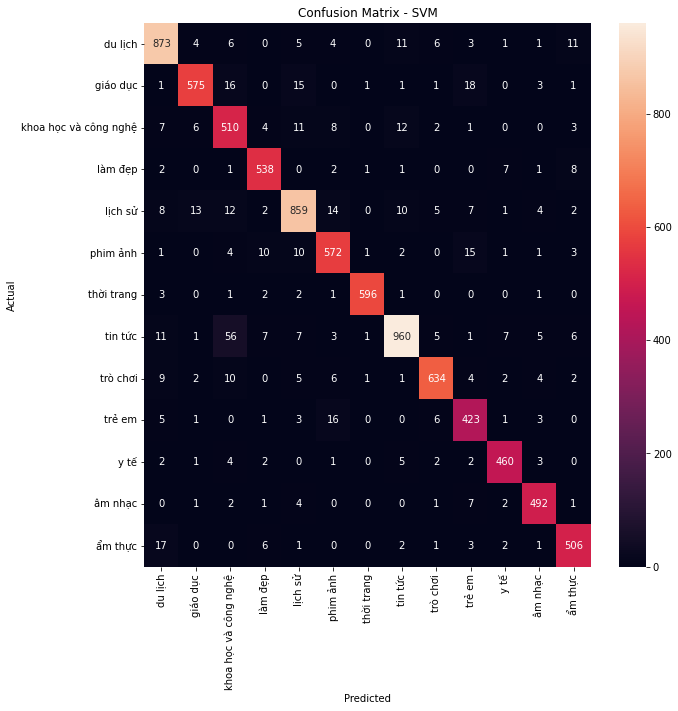

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


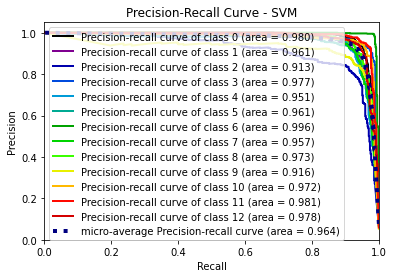

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scikitplot as skplt


y_pred = svm.predict(X_test)
y_probas = svm.predict_proba(X_test)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - SVM')
plt.show()

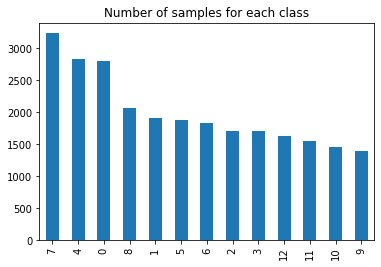

In [ ]:
data['Label'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples', 
                                                                title='Number of samples for each class')

Testing (for web deployment)

In [ ]:
word_tokenize("Flo Tóp Tóp VS Flo Đấu Giải, Góc nhìn tuyển thủ Florentino SGP Yiwei")

['Flo',
 'Tóp',
 'Tóp',
 'VS',
 'Flo',
 'Đấu',
 'Giải',
 ',',
 'Góc',
 'nhìn',
 'tuyển thủ',
 'Florentino SGP Yiwei']

In [ ]:
d = {'title': [" ".join(['flo','tóp','vs','đấu','giải','góc','nhìn','tuyển_thủ','florentino','sgp_yiwei'])]}
df = pd.DataFrame(data=d)

In [ ]:
df

,title
0,flo tóp vs đấu giải góc nhìn tuyển_thủ florent...


In [ ]:
sample = tfidf.transform(df.title).toarray()

In [ ]:
y_pred = svm.predict(sample)
y_pred

array([8])